#Data Dictionary
survival---Survival---0 = No, 1 = Yes
pclass---Ticket class---1 = 1st, 2 = 2nd, 3 = 3rd
sex---Sex	
Age---Age in years	
sibsp---# of siblings / spouses aboard the Titanic	
parch---# of parents / children aboard the Titanic	
ticket---Ticket number	
fare---Passenger fare	
cabin---Cabin number	
embarked---Port of Embarkation---C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
                    1st = Upper
                    2nd = Middle
                    3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [45]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
train_data.replace('?', np.nan, inplace= True)
train_data = train_data.astype({"Age": np.float64, "Fare": np.float64})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)
print("% of women who survived:", rate_women)

% of men who survived: 0.18890814558058924
% of women who survived: 0.7420382165605095


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

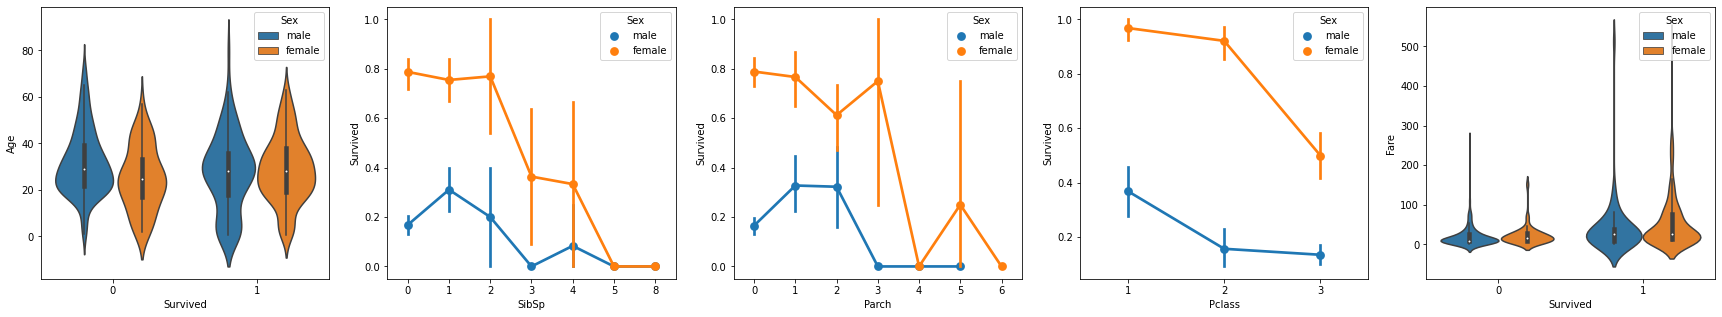

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=train_data, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=train_data, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=train_data, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_data, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=train_data, ax=axs[4])

In [64]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [61]:
test_data.replace({'male': 1, 'female': 0}, inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0


In [65]:
train_data.corr().abs()[['Survived']]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [68]:
train_data['Relatives'] = train_data.apply (lambda row: int((row['SibSp'] + row['Parch']) > 0), axis=1)
train_data.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Relatives,0.203367


In [69]:
train_data = train_data[['Sex', 'Pclass','Age','Relatives','Fare','Survived']].dropna()

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_data[['Sex','Pclass','Age','Relatives','Fare']], train_data.Survived, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7482517482517482


###Use  neural network

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [30]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
